<a href="https://colab.research.google.com/github/ElizavetaMelis/Blog/blob/main/testing_capstone_project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# Upload your CSV file
uploaded = files.upload()

Saving vaccination_all_tweets - initial.csv to vaccination_all_tweets - initial.csv


In [ ]:
# Get the filename of the uploaded file
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name, nrows=20)  # Read only the first 20 rows
print(df.head())

                    id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405  

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

id                  0
user_name           0
user_location       6
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            5
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64


In [ ]:
df['user_location'].fillna('Unknown', inplace=True)

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            5
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
# Check the cleaned dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                20 non-null     int64 
 1   user_name         20 non-null     object
 2   user_location     20 non-null     object
 3   user_description  20 non-null     object
 4   user_created      20 non-null     object
 5   user_followers    20 non-null     int64 
 6   user_friends      20 non-null     int64 
 7   user_favourites   20 non-null     int64 
 8   user_verified     20 non-null     bool  
 9   date              20 non-null     object
 10  text              20 non-null     object
 11  hashtags          15 non-null     object
 12  source            20 non-null     object
 13  retweets          20 non-null     int64 
 14  favorites         20 non-null     int64 
 15  is_retweet        20 non-null     bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 2.4+ KB
None
     

In [ ]:
!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from collections import Counter
import re

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Count unique users, posts, etc.
print("Number of unique users:", df['user_name'].nunique())
print("Total tweets:", len(df))
print("User retweets:", df['retweets'].mean())
print("User favorites:", df['user_favourites'].mean())

Number of unique users: 19
Total tweets: 20
User retweets: 25.35
User favorites: 10083.05


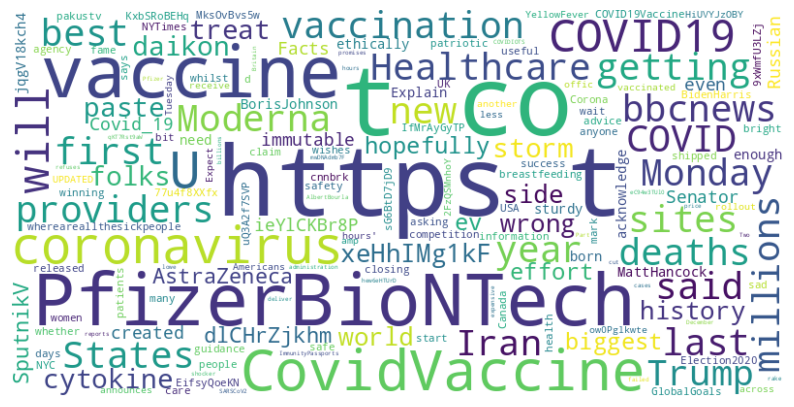

In [ ]:
text = " ".join(tweet for tweet in df['text'])
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

# Define stop words
stop_words = set(stopwords.words('english'))

# Clean text and remove stop words
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#', '', text)        # Remove hashtags symbol
    text = re.sub(r'\W', ' ', text)      # Remove special characters
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)

# Find the most common words
words = " ".join(df['clean_text']).split()
common_words = Counter(words).most_common(10)
print("Most common words:", common_words)


Most common words: [('pfizerbiontech', 9), ('vaccine', 9), ('covidvaccine', 5), ('coronavirus', 4), ('covid19', 3), ('us', 3), ('said', 2), ('vaccination', 2), ('moderna', 2), ('last', 2)]


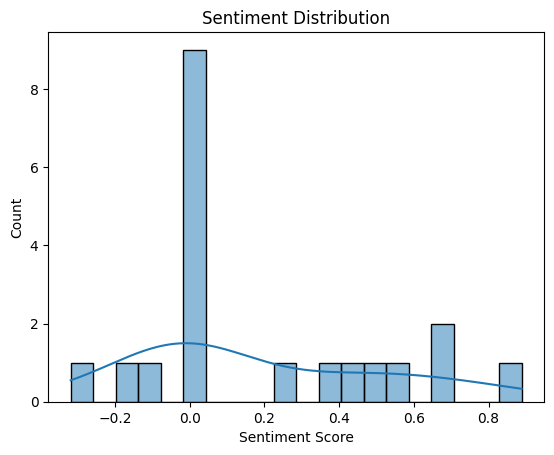

In [ ]:
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.show()

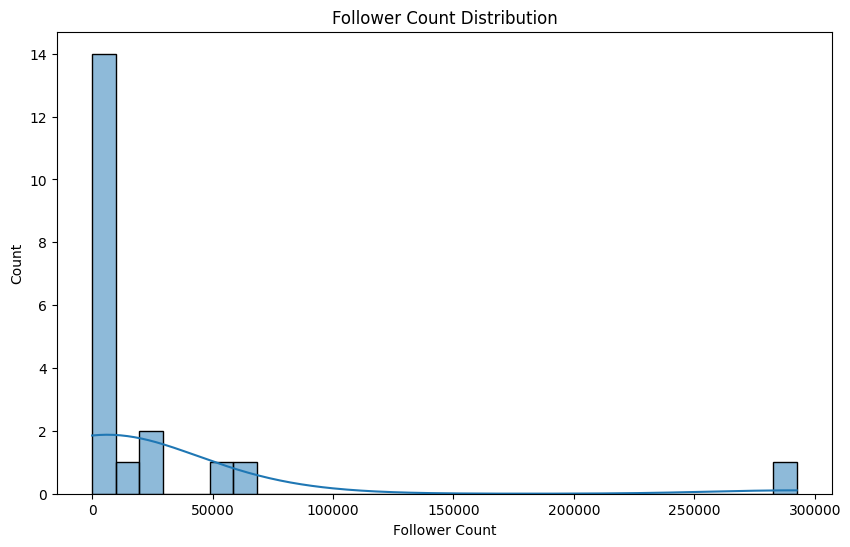

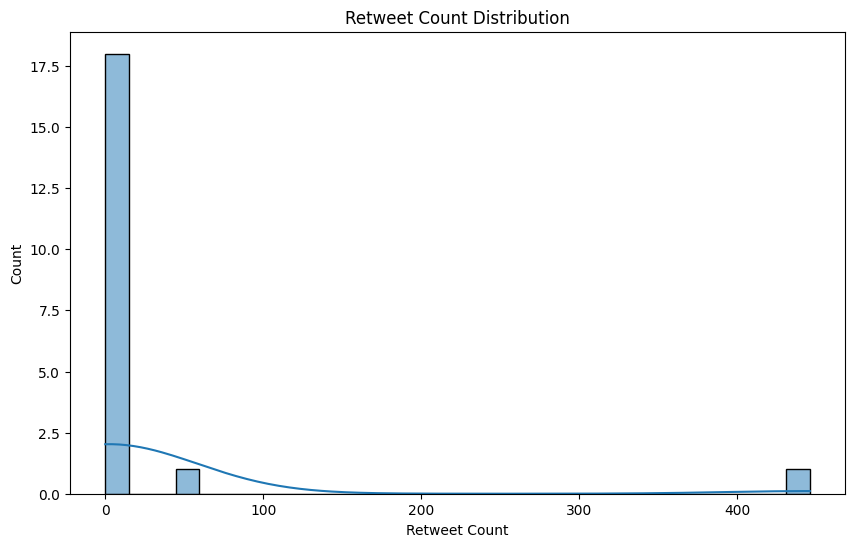

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['user_followers'], bins=30, kde=True)
plt.title('Follower Count Distribution')
plt.xlabel('Follower Count')
plt.show()

# Engagement metrics
plt.figure(figsize=(10, 6))
sns.histplot(df['retweets'], bins=30, kde=True)
plt.title('Retweet Count Distribution')
plt.xlabel('Retweet Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127801 (\N{ROSE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  fig.canvas.print_figure(bytes_

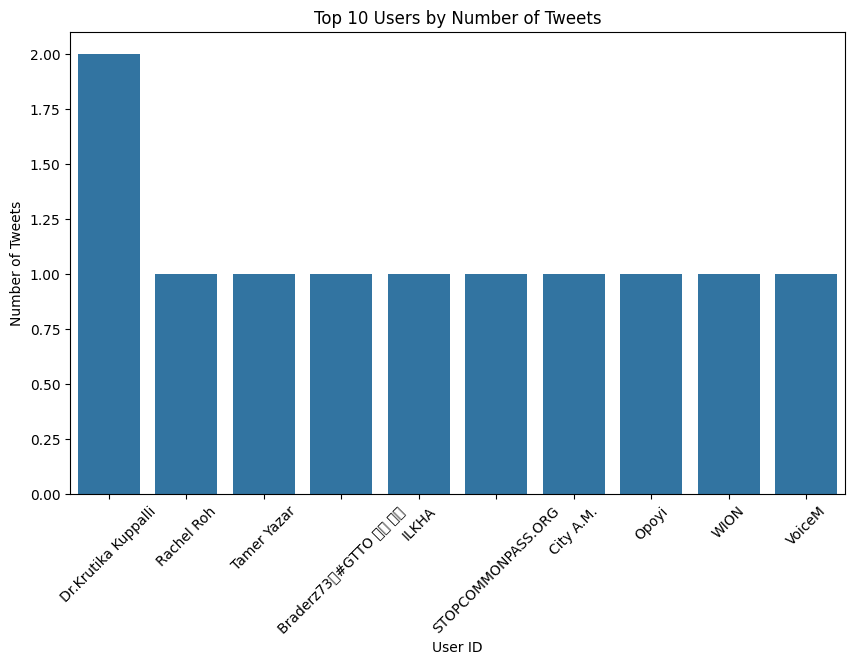

In [ ]:
top_users = df['user_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.index, y=top_users.values)
plt.title('Top 10 Users by Number of Tweets')
plt.xlabel('User ID')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install transformers scikit-learn pandas numpy nltk

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu --no-warn-script-location

Looking in indexes: https://download.pytorch.org/whl/cpu


In [ ]:
#!pip install tf-keras --user

In [ ]:
from transformers import pipeline

# Load a pre-trained fake news detection model
classifier = pipeline("text-classification", model="roberta-base-openai-detector")

# Classify each row in the text column
df['prediction'] = df['text'].apply(lambda text: classifier(text)[0]['label'])

# Save the updated DataFrame to a new CSV file
df.to_csv("classified_news.csv", index=False)

print("Predictions saved to 'classified_news.csv'")

Some weights of the model checkpoint at roberta-base-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Predictions saved to 'classified_news.csv'


In [ ]:
from google.colab import files
files.download("classified_news.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>